# Demo

This package is able to generate different types of random graphs using stub matching. Note: it won't be **perfectly** independent samples as from a Markov chain sampling procedure, but for all practical purposes it is good enough.

## Clustered graphs

This method generates one-mode projections of bipartite graphs, as in [Newman's paper](https://doi.org/10.1103/PhysRevE.68.026121). Note: in this paper, Newman also consider a probability $p$ of existance for all edges; one can just take the outputed edge list by our method and accept all edge with probability $p$ to mimic this effect.

### Simple example: delta membership and clique size

First, let's import the generator and networkx to visualize the result

In [1]:
from rggen import ClusteredGraphGenerator as cgg
import networkx as nx
import matplotlib.pyplot as plt

To create a generator object, we need to define three quantities: the membership sequence, the group (or clique) size sequence and the seed (just a random integer). For instance, here we assume that all nodes are part of exactly 5 cliques and that all cliques are of size 3. Implicitely, this means all nodes should be of degree 10. We use 60 nodes as an example.

In [2]:
N = 60
membership_sequence = [5]*N
clique_size_sequence = [3]*(sum(membership_sequence)//3)

assert sum(membership_sequence) == sum(clique_size_sequence)

**Important note:** The sum of the membership sequence must equal the sum of the clique size sequence in order for the matching to work. Indeed, the total number of "stubs" from nodes to clique must match the total number of availables "spots" in the cliques. Thinking of this as a bipartite graph, the total number of stubs from each type of node must match one another.

We can now create our generator and get some graph instances:

In [3]:
gen = cgg(membership_sequence,clique_size_sequence,seed=42)
edge_list, _ = gen.get_graph()

Let's plot the resulting graph

In [4]:
G = nx.Graph(edge_list)

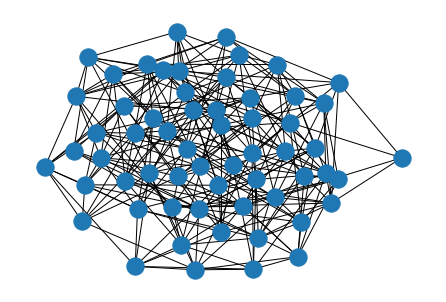

In [5]:
nx.draw_spring(G)

**Note**: that the degrees are not all exactly 10

Text(0, 0.5, 'number of nodes')

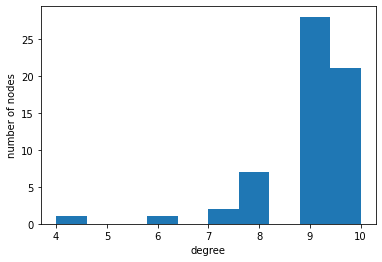

In [6]:
degree_sequence = [G.degree(node) for node in G]
plt.hist(degree_sequence)
plt.xlabel("degree")
plt.ylabel("number of nodes")

This happens because some nodes belong to the same cliques more than once, and instead of creating multigraph (which we could by calling the function `get_multigraph()`, we remove the multiedges to have a simple graph. For larger networks, this effect is marginal, because the probability of "collision" decreases as $1/N$. See for instance with 6000 nodes:

Text(0, 0.5, 'number of nodes')

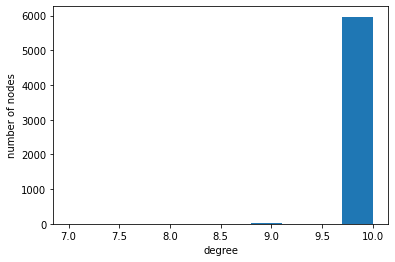

In [7]:
N = 6000
membership_sequence = [5]*N
clique_size_sequence = [3]*(sum(membership_sequence)//3)
gen = cgg(membership_sequence,clique_size_sequence,seed=42)
edge_list, _ = gen.get_graph()
G = nx.Graph(edge_list)
degree_sequence = [G.degree(node) for node in G]
plt.hist(degree_sequence)
plt.xlabel("degree")
plt.ylabel("number of nodes")

While the collision probability is small, even for a large network, the clustering remains high:

In [9]:
nx.transitivity(G)

0.11188243277820423